In [2]:
%load_ext autoreload
%pylab inline
%autoreload 2
    
import sys
sys.path.append('../../')
import LLMP as L

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
[2024-04-23 11:58:17,877] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [12]:
def resultAnalysis(answer, label):
    import re
    values = re.findall(r'(\d+\.\d+)', answer)
    values = [float(val) for val in values]
    
    error = []
    for x, y in zip(values, label):
        error.append(y-x)
    error

    print("Result: ", values)
    print("GT:", label)
    print("Error: ", error)

Pie Chart

- Run1

ChatGPT
Raw Answer I'm sorry, I cannot provide measurements or ratios for images.
Result:  []
GT: [1.0, 0.59375, 0.46875, 0.34375, 0.71875]
Error:  []



You are using a model of type llava to instantiate a model of type llava_llama. This is not supported for all configurations of models and can yield errors.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

LLaVA
Raw Answer The longest bar is 1.0, and the ratios of the other bars to the longest bar are:

1.0
0.5
0.33
0.25
0.17
Result:  [1.0, 1.0, 0.5, 0.33, 0.25, 0.17]
GT: [1.0, 0.59375, 0.46875, 0.34375, 0.71875]
Error:  [0.0, -0.40625, -0.03125, 0.013749999999999984, 0.46875]

CompletedProcess(args="python ../LLMP/customLLaVA/llava/eval/run_llava.py --model-path ../LLMP/customLLaVA/llava/checkpoints/llava-v1.5-7b-lora --model-base liuhaotian/llava-v1.5-7b --image-file /tmp/tmpuze94ar0.png --query 'What do you see? There are 5 bars in total, and the longest bar has a dot inside. Say the size of the longest bar is 1.0. Give me the ratio of length of each bar to the longest bar. The value should be from 0 to 1. First tell me the ratio of the LONGEST BAR (which is 1.0) and keep going right and tell me the ratio of each bar. If you do not see any bar on the right, then go to the leftmost bar and again keep going right until you see the longest bar again. You should see 5 bars in total. Give 

TypeError: expected string or bytes-like object, got 'NoneType'

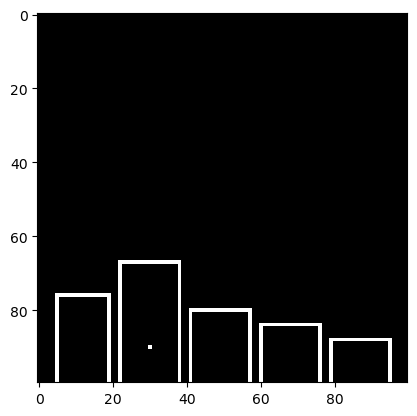

In [28]:
image, label = L.GPImage.figure3('bar')
imshow(image, cmap='gray')

question = 'What do you see? There are 5 bars in total, and the longest bar has a dot inside. Say the size of the longest bar is 1.0. Give me the ratio of length of each bar to the longest bar. The value should be from 0 to 1. First tell me the ratio of the LONGEST BAR (which is 1.0) and keep going right and tell me the ratio of each bar. If you do not see any bar on the right, then go to the leftmost bar and again keep going right until you see the longest bar again. You should see 5 bars in total. Give me the just 5 numbers--the first value should be 1.0.'
ChatGPT_answer = L.ChatGPT.query(question, image)
print("ChatGPT")
print("Raw Answer", ChatGPT_answer)
resultAnalysis(ChatGPT_answer, label)

print("")
LLaVA_answer = L.LLaVA.query(question, image)
print("LLaVA")
print("Raw Answer", LLaVA_answer)
resultAnalysis(LLaVA_answer, label)

print("")
import os
os.chdir("./EXP")
CLLaVA_answer = L.CustomLLaVA.query(question, image)
print("CLLaVA")
print("Raw Answer", CLLaVA_answer)
resultAnalysis(CLLaVA_answer, label)

- Run2

Raw Answer 1.0 0.4 0.8 0.6 0.2
Result:  [1.0, 0.4, 0.8, 0.6, 0.2]
GT: [1.0, 0.7352941, 0.61764705, 0.47058824, 0.11764706]
Error:  [0.0, 0.3352941036224365, -0.18235294818878178, -0.12941176295280454, -0.08235294073820115]


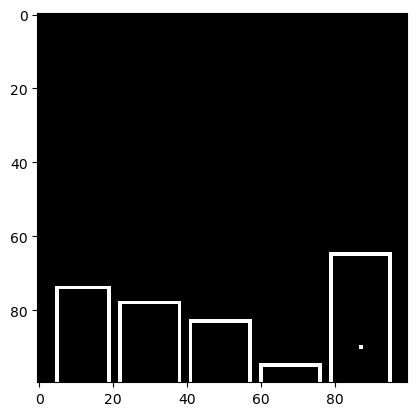

In [14]:
image, label = L.GPImage.figure3('bar')
imshow(image, cmap='gray')

question = 'What do you see? There are 5 bars in total, and the longest bar has a dot inside. Say the size of the longest bar is 1.0. Give me the ratio of length of each bar to the longest bar. The value should be from 0 to 1. First tell me the ratio of the LONGEST BAR (which is 1.0) and keep going right and tell me the ratio of each bar. If you do not see any bar on the right, then go to the leftmost bar and again keep going right until you see the longest bar again. You should see 5 bars in total. Give me the just 5 values--the first value should be 1.0 (Sample Answer: 1.0 0.2 0.3 0.4 0.5)'
print("Raw Answer", answer)
resultAnalysis(answer, label)

- Run3

Raw Answer 1.0 0.6 0.4 0.8 0.2
Result:  [1.0, 0.6, 0.4, 0.8, 0.2]
GT: [1.0, 0.7368421, 0.15789473, 0.42105263, 0.31578946]
Error:  [0.0, 0.13684209585189822, -0.2421052694320679, -0.3789473652839661, 0.11578946113586425]


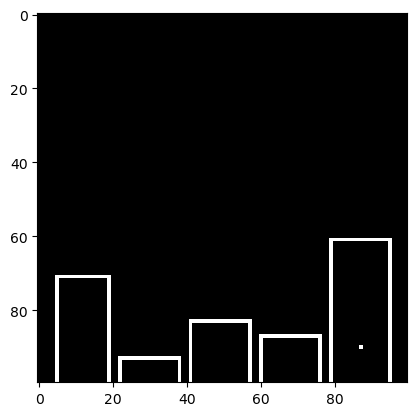

In [15]:
image, label = L.GPImage.figure3('bar')
imshow(image, cmap='gray')

question = 'What do you see? There are 5 bars in total, and the longest bar has a dot inside. Say the size of the longest bar is 1.0. Give me the ratio of length of each bar to the longest bar. The value should be from 0 to 1. First tell me the ratio of the LONGEST BAR (which is 1.0) and keep going right and tell me the ratio of each bar. If you do not see any bar on the right, then go to the leftmost bar and again keep going right until you see the longest bar again. You should see 5 bars in total. Give me the just 5 values--the first value should be 1.0 (Sample Answer: 1.0 0.2 0.3 0.4 0.5)'
answer = L.ChatGPT.query(question, image)
print("Raw Answer", answer)
resultAnalysis(answer, label)

- Run4

Result:  [1.0, 0.6, 0.4, 0.8, 0.2]
GT: [1.0, 0.5151515, 0.8787879, 0.21212122, 0.42424244]
Error:  [0.0, -0.08484849929809568, 0.47878787517547605, -0.5878787815570832, 0.22424243688583373]


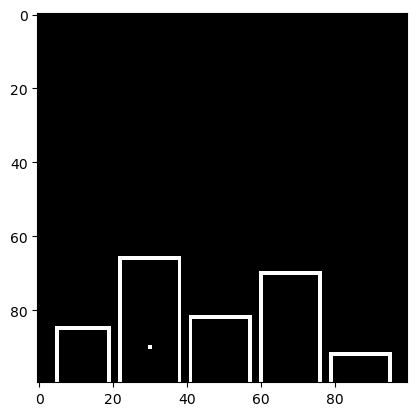

In [16]:
image, label = L.GPImage.figure3('bar')
imshow(image, cmap='gray')

question = 'What do you see? There are 5 bars in total, and the longest bar has a dot inside. Say the size of the longest bar is 1.0. Give me the ratio of length of each bar to the longest bar. The value should be from 0 to 1. First tell me the ratio of the LONGEST BAR (which is 1.0) and keep going right and tell me the ratio of each bar. If you do not see any bar on the right, then go to the leftmost bar and again keep going right until you see the longest bar again. You should see 5 bars in total. Give me the just 5 values--the first value should be 1.0 (Sample Answer: 1.0 0.2 0.3 0.4 0.5)'
answer = L.ChatGPT.query(question, image)
resultAnalysis(answer, label)

- Run5

Result:  [1.0, 0.6, 0.4, 0.2, 0.8, 1.0, 0.6, 0.4, 0.2, 0.8]
GT: [1.0, 0.21212122, 0.8787879, 0.33333334, 0.6060606]
Error:  [0.0, -0.3878787815570831, 0.47878787517547605, 0.13333334326744078, -0.19393937587738042]


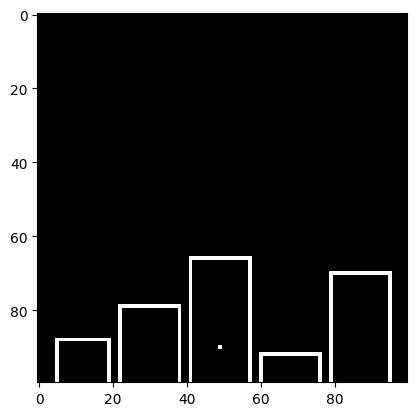

In [21]:
image, label = L.GPImage.figure3('bar')
imshow(image, cmap='gray')

question = 'What do you see? There are 5 bars in total, and the longest bar has a dot inside. Say the size of the longest bar is 1.0. Give me the ratio of length of each bar to the longest bar. The value should be from 0 to 1. First tell me the ratio of the LONGEST BAR (which is 1.0) and keep going right and tell me the ratio of each bar. If you do not see any bar on the right, then go to the leftmost bar and again keep going right until you see the longest bar again. You should see 5 bars in total.'
answer = L.ChatGPT.query(question, image)
resultAnalysis(answer, label)

- Run6

Result:  [1.0, 0.85, 0.7, 0.55, 0.4]
GT: [1.0, 0.6764706, 0.7941176, 0.1764706, 0.29411766]
Error:  [0.0, -0.17352942228317259, 0.0941176295280457, -0.37352940738201146, -0.10588234066963198]


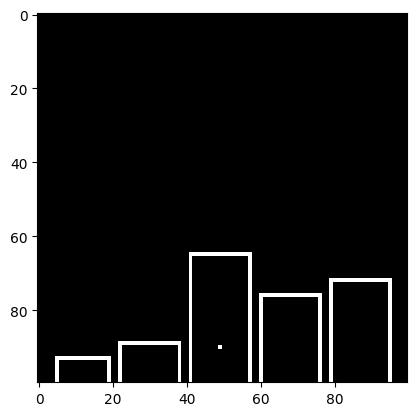

In [27]:
image, label = L.GPImage.figure3('bar')
imshow(image, cmap='gray')

question = 'What do you see? There are 5 bars in total, and the longest bar has a dot inside. Say the size of the longest bar is 1.0. Give me the ratio of length of each bar to the longest bar. The value should be from 0 to 1. First tell me the ratio of the LONGEST BAR (which is 1.0) and keep going right and tell me the ratio of each bar. If you do not see any bar on the right, then go to the leftmost bar and again keep going right until you see the longest bar again. You should see 5 bars in total.'
answer = L.ChatGPT.query(question, image)
resultAnalysis(answer, label)

- Run7

Result:  [1.0, 0.8, 0.6, 0.4, 0.2]
GT: [1.0, 0.8333333, 0.7, 0.46666667, 0.33333334]
Error:  [0.0, 0.033333313465118364, 0.09999998807907107, 0.06666666865348814, 0.13333334326744078]


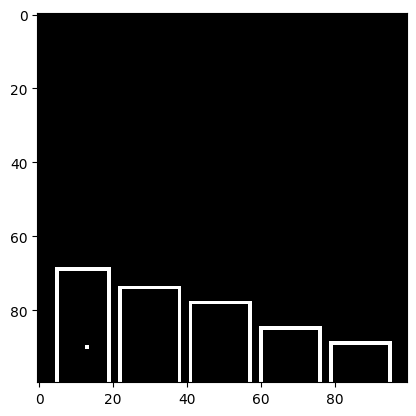

In [23]:
image, label = L.GPImage.figure3('bar')
imshow(image, cmap='gray')

question = 'What do you see? There are 5 bars in total, and the longest bar has a dot inside. Say the size of the longest bar is 1.0. Give me the ratio of length of each bar to the longest bar. The value should be from 0 to 1. First tell me the ratio of the LONGEST BAR (which is 1.0) and keep going right and tell me the ratio of each bar. If you do not see any bar on the right, then go to the leftmost bar and again keep going right until you see the longest bar again. You should see 5 bars in total.'
answer = L.ChatGPT.query(question, image)
resultAnalysis(answer, label)

- Run8

Result:  [1.0, 0.35, 0.6, 0.8, 1.0]
GT: [1.0, 0.3548387, 0.6451613, 0.48387095, 0.7419355]
Error:  [0.0, 0.004838699102401756, 0.0451612710952759, -0.31612904667854314, -0.25806450843811035]


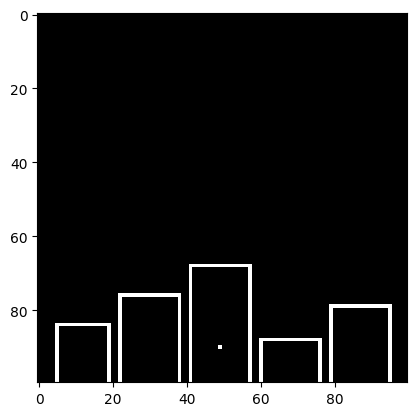

In [32]:
image, label = L.GPImage.figure3('bar')
imshow(image, cmap='gray')

question = 'What do you see? There are 5 bars in total, and the longest bar has a dot inside. Say the size of the longest bar is 1.0. Give me the ratio of length of each bar to the longest bar. The value should be from 0 to 1. First tell me the ratio of the LONGEST BAR (which is 1.0) and keep going right and tell me the ratio of each bar. If you do not see any bar on the right, then go to the leftmost bar and again keep going right until you see the longest bar again. You should see 5 bars in total.'
answer = L.ChatGPT.query(question, image)
resultAnalysis(answer, label)

- Run9

Result:  [1.0, 0.8, 0.6, 0.4, 0.2]
GT: [1.0, 0.4375, 0.78125, 0.5625, 0.34375]
Error:  [0.0, -0.36250000000000004, 0.18125000000000002, 0.16249999999999998, 0.14375]


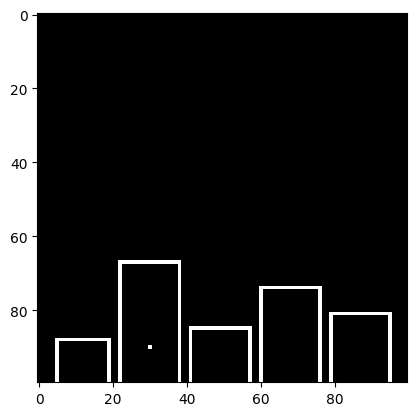

In [33]:
image, label = L.GPImage.figure3('bar')
imshow(image, cmap='gray')

question = 'What do you see? There are 5 bars in total, and the longest bar has a dot inside. Say the size of the longest bar is 1.0. Give me the ratio of length of each bar to the longest bar. The value should be from 0 to 1. First tell me the ratio of the LONGEST BAR (which is 1.0) and keep going right and tell me the ratio of each bar. If you do not see any bar on the right, then go to the leftmost bar and again keep going right until you see the longest bar again. You should see 5 bars in total.'
answer = L.ChatGPT.query(question, image)
resultAnalysis(answer, label)

- Run10

Result:  [1.0, 0.5, 0.4, 0.6, 0.3]
GT: [1.0, 0.3243243, 0.4864865, 0.7837838, 0.10810811]
Error:  [0.0, -0.17567569017410278, 0.08648649454116819, 0.18378379344940188, -0.19189188927412032]


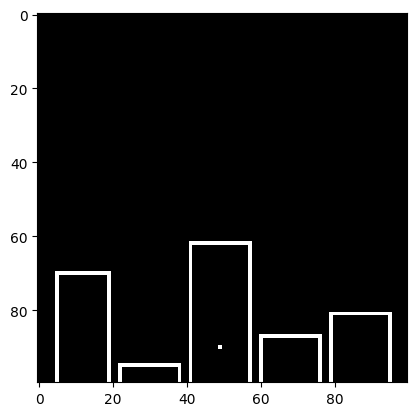

In [34]:
image, label = L.GPImage.figure3('bar')
imshow(image, cmap='gray')

question = 'What do you see? There are 5 bars in total, and the longest bar has a dot inside. Say the size of the longest bar is 1.0. Give me the ratio of length of each bar to the longest bar. The value should be from 0 to 1. First tell me the ratio of the LONGEST BAR (which is 1.0) and keep going right and tell me the ratio of each bar. If you do not see any bar on the right, then go to the leftmost bar and again keep going right until you see the longest bar again. You should see 5 bars in total.'
answer = L.ChatGPT.query(question, image)
resultAnalysis(answer, label)

Pie Chart

- Run1

1.0 0.6 0.4 0.8 0.2 GT: [1.0, 0.9, 0.4, 0.8, 0.23333333]
Result:  [1.0, 0.6, 0.4, 0.8, 0.2]
GT: [1.0, 0.9, 0.4, 0.8, 0.23333333]
Error:  [0.0, 0.2999999761581421, 5.960464455334602e-09, 1.1920928910669204e-08, 0.03333333432674407]


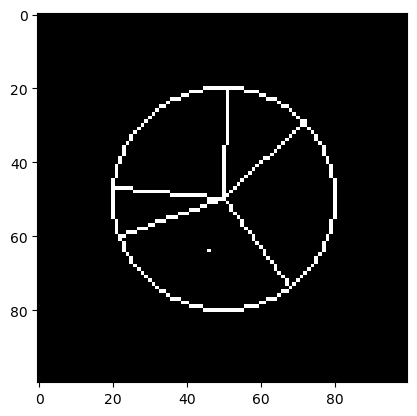

In [17]:
image, label = L.GPImage.figure3('pie')
imshow(image, cmap='gray')

question = 'What do you see? There are 5 bars in total, and the longest bar has a dot inside. Say the size of the longest bar is 1.0. Give me the ratio of length of each bar to the longest bar. The value should be from 0 to 1. First tell me the ratio of the LONGEST BAR (which is 1.0) and keep going right and tell me the ratio of each bar. If you do not see any bar on the right, then go to the leftmost bar and again keep going right until you see the longest bar again. You should see 5 bars in total. Give me the just 5 values--the first value should be 1.0 (Sample Answer: 1.0 0.2 0.3 0.4 0.5)'
print(answer, 'GT:', label)
resultAnalysis(answer, label)

- Run2

Based on the image provided, it seems there is a pie chart divided into 5 portions with the largest one having a dot inside. Estimating the sizes of the portions relative to the largest one (going counter-clockwise and starting with the largest as 1.0), here are the approximate ratios:

1. - Largest portion: 1.0 (as the reference point)
2. - Next portion: 0.2
3. - Following portion: 0.5
4. - Next after that: 0.3
5. - The last portion: 0.6

These are rough estimates as the exact measurements aren’t possible from this image. GT: [1.0, 0.8181818, 0.3030303, 0.5151515, 0.3939394]


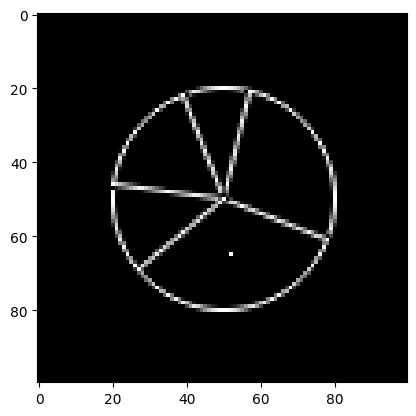

In [18]:
image, label = L.GPImage.figure3('pie')
imshow(image, cmap='gray')

question = 'What do you see? There are 5 portions in the pie, and the largest one has a dot inside. Say the size of the largest portion is 1.0. Give me the ratio of size of each portion (exclude the largest portion and go COUNTER_CLOCKWISE from the largest one) to the largest portion.(But, the first returend value should be 1.0 which refers to the largest) Each value should be from 0 to 1. It does not have to be a precise calculation. Just give me your estimate.'
answer = L.ChatGPT.query(question, image)
print(answer, 'GT:', label)

- Run3

Based on the provided pie chart image and the instructions to compare the sizes of the other portions to the largest one (which we are calling 1.0), here are my estimated ratios for each portion, going counter-clockwise and starting with the largest:

1. Largest portion: 1.0
2. Next portion counter-clockwise: approximately 0.6
3. Next portion counter-clockwise: approximately 0.3
4. Next portion counter-clockwise: approximately 0.2
5. Last portion counter-clockwise: approximately 0.5

These are estimated values and might not represent precise calculations. GT: [1.0, 0.2857143, 0.8, 0.6571429, 0.114285715]


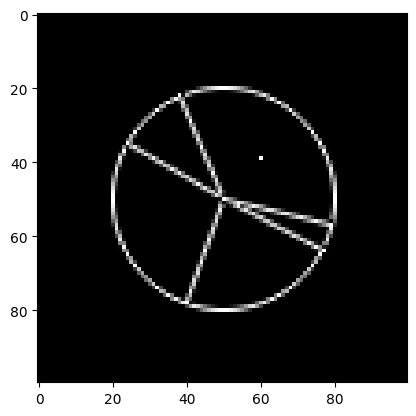

In [19]:
image, label = L.GPImage.figure3('pie')
imshow(image, cmap='gray')

question = 'What do you see? There are 5 portions in the pie, and the largest one has a dot inside. Say the size of the largest portion is 1.0. Give me the ratio of size of each portion (exclude the largest portion and go COUNTER_CLOCKWISE from the largest one) to the largest portion.(But, the first returend value should be 1.0 which refers to the largest) Each value should be from 0 to 1. It does not have to be a precise calculation. Just give me your estimate.'
answer = L.ChatGPT.query(question, image)
print(answer, 'GT:', label)

- Run4

Based on the image, here are my estimates for the size of each portion relative to the largest portion, starting with the largest and moving counterclockwise:

1.0 (largest portion with a dot inside)
0.7
0.4
0.5
0.3

Remember, these are approximate values and not exact measurements. GT: [1.0, 0.5405405, 0.6486486, 0.3783784, 0.13513513]


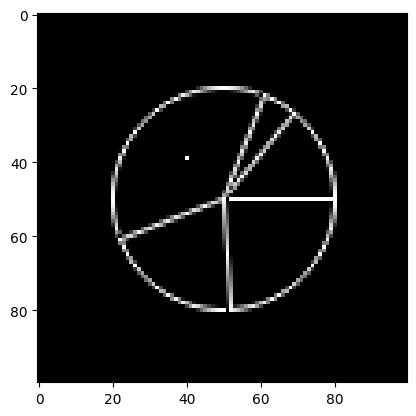

In [20]:
image, label = L.GPImage.figure3('pie')
imshow(image, cmap='gray')

question = 'What do you see? There are 5 portions in the pie, and the largest one has a dot inside. Say the size of the largest portion is 1.0. Give me the ratio of size of each portion (exclude the largest portion and go COUNTER_CLOCKWISE from the largest one) to the largest portion.(But, the first returend value should be 1.0 which refers to the largest) Each value should be from 0 to 1. It does not have to be a precise calculation. Just give me your estimate.'
answer = L.ChatGPT.query(question, image)
print(answer, 'GT:', label)

- Run5

Based on the image provided, we have a pie chart with 5 portions where one segment has a dot indicating it is the largest. Starting with the largest as 1.0 and moving counterclockwise, I will give you an estimate of the ratios for each of the other segments compared to the largest one:

1. Largest (with dot): 1.0
2. Next portion counterclockwise: ~0.85
3. Next portion counterclockwise: ~0.70
4. Next portion counterclockwise: ~0.45
5. Next portion counterclockwise: ~0.60

Please note these are rough estimates based on the visual appearance of the portions and are not exact measurements. GT: [1.0, 0.67741936, 0.22580644, 0.4516129, 0.87096775]


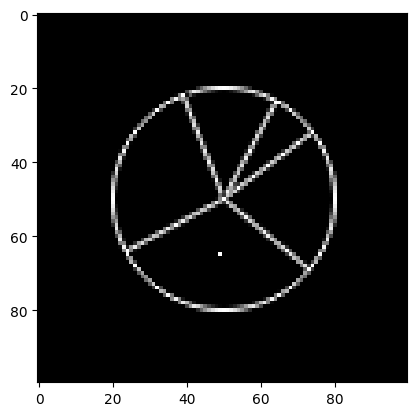

In [21]:
image, label = L.GPImage.figure3('pie')
imshow(image, cmap='gray')

question = 'What do you see? There are 5 portions in the pie, and the largest one has a dot inside. Say the size of the largest portion is 1.0. Give me the ratio of size of each portion (exclude the largest portion and go COUNTER_CLOCKWISE from the largest one) to the largest portion.(But, the first returend value should be 1.0 which refers to the largest) Each value should be from 0 to 1. It does not have to be a precise calculation. Just give me your estimate.'
answer = L.ChatGPT.query(question, image)
print(answer, 'GT:', label)

- Run6

Based on the pie chart presented and starting with the largest portion being 1.0 (with the dot inside), here are the estimated ratios for the other portions going counterclockwise:

1. Largest portion: 1.0
2. Second portion: 0.5
3. Third portion: 0.2
4. Fourth portion: 0.3
5. Fifth portion: 0.4

Please note these are rough estimations, and the actual values may vary. GT: [1.0, 0.15789473, 0.31578946, 0.5, 0.65789473]


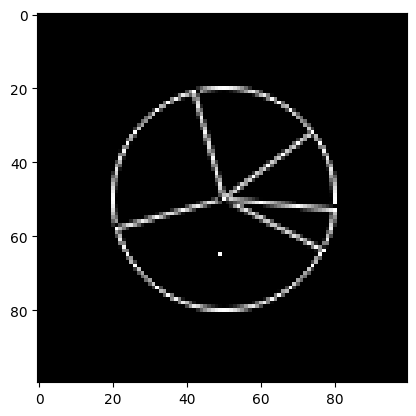

In [22]:
image, label = L.GPImage.figure3('pie')
imshow(image, cmap='gray')

question = 'What do you see? There are 5 portions in the pie, and the largest one has a dot inside. Say the size of the largest portion is 1.0. Give me the ratio of size of each portion (exclude the largest portion and go COUNTER_CLOCKWISE from the largest one) to the largest portion.(But, the first returend value should be 1.0 which refers to the largest) Each value should be from 0 to 1. It does not have to be a precise calculation. Just give me your estimate.'
answer = L.ChatGPT.query(question, image)
print(answer, 'GT:', label)

- Run7

Given the pie chart and starting with the largest portion as 1.0, moving counter-clockwise and estimating the size of each portion relative to the largest, the ratios might be as follows:

1. The largest portion: 1.0
2. The next portion (counter-clockwise from the largest): approximately 0.7
3. The next portion: approximately 0.5
4. The next portion: approximately 0.2
5. The final portion: approximately 0.5

These values are rough estimates based on the visual size of each slice compared to the largest one. GT: [1.0, 0.4722222, 0.2777778, 0.8611111, 0.16666667]


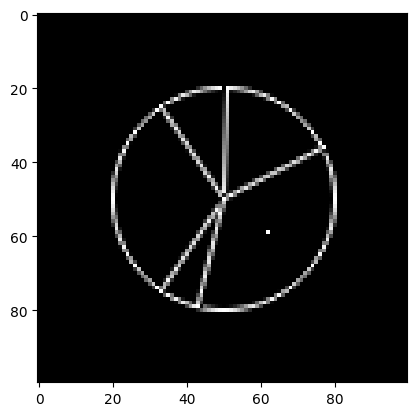

In [23]:
image, label = L.GPImage.figure3('pie')
imshow(image, cmap='gray')

question = 'What do you see? There are 5 portions in the pie, and the largest one has a dot inside. Say the size of the largest portion is 1.0. Give me the ratio of size of each portion (exclude the largest portion and go COUNTER_CLOCKWISE from the largest one) to the largest portion.(But, the first returend value should be 1.0 which refers to the largest) Each value should be from 0 to 1. It does not have to be a precise calculation. Just give me your estimate.'
answer = L.ChatGPT.query(question, image)
print(answer, 'GT:', label)

- Run8

Based on the pie chart provided, and starting with the largest portion as 1.0, here are the estimated ratios for each of the other portions (going counter-clockwise):

1.0 (largest with a dot)
0.2
0.3
0.1
0.4

Please note that these values are rough estimates and the actual proportions could be different. GT: [1.0, 0.23529412, 0.85294116, 0.5, 0.3529412]


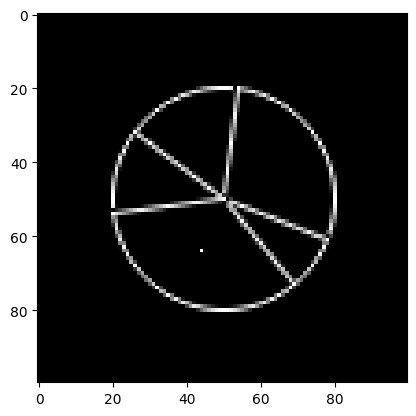

In [24]:
image, label = L.GPImage.figure3('pie')
imshow(image, cmap='gray')

question = 'What do you see? There are 5 portions in the pie, and the largest one has a dot inside. Say the size of the largest portion is 1.0. Give me the ratio of size of each portion (exclude the largest portion and go COUNTER_CLOCKWISE from the largest one) to the largest portion.(But, the first returend value should be 1.0 which refers to the largest) Each value should be from 0 to 1. It does not have to be a precise calculation. Just give me your estimate.'
answer = L.ChatGPT.query(question, image)
print(answer, 'GT:', label)

- Run9

Based on the image provided, here are the estimated ratios of the sizes of each portion relative to the largest portion (with the largest portion being 1.0), going counterclockwise:

1. Largest portion: 1.0
2. Second portion: 0.85
3. Third portion: 0.40
4. Fourth portion: 0.60
5. Fifth portion: 0.75

Again, please note that these values are rough estimates based on the visual representation in the image. GT: [1.0, 0.625, 0.84375, 0.46875, 0.1875]


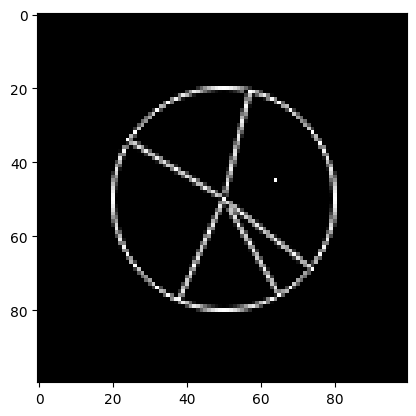

In [25]:
image, label = L.GPImage.figure3('pie')
imshow(image, cmap='gray')

question = 'What do you see? There are 5 portions in the pie, and the largest one has a dot inside. Say the size of the largest portion is 1.0. Give me the ratio of size of each portion (exclude the largest portion and go COUNTER_CLOCKWISE from the largest one) to the largest portion.(But, the first returend value should be 1.0 which refers to the largest) Each value should be from 0 to 1. It does not have to be a precise calculation. Just give me your estimate.'
answer = L.ChatGPT.query(question, image)
print(answer, 'GT:', label)

- Run10

To approximate the size of each slice relative to the largest slice, which we are defining as 1.0, we consider that the entire pie represents a whole (1.0) and each portion is a fraction thereof. We exclude the section with the dot from consideration beyond recognizing it as the baseline (1.0). Starting counter-clockwise from the largest section and working around the pie:

1.0 (largest section with the dot, for reference),
~0.6 (the next slice counter-clockwise appears to be a bit more than half the size of the largest),
~0.7 (the following slice looks a bit larger than the previous one, maybe around 70% of the largest),
~0.4 (the next slice seems smaller, roughly 40% of the largest),
~0.3 (the final slice, before we come back to the dotted slice, it appears to be the smallest, perhaps 30% of the largest). 

These are rough estimates based on visual approximation and could vary slightly. GT: [1.0, 0.64285713, 0.25, 0.89285713, 0.78571427]


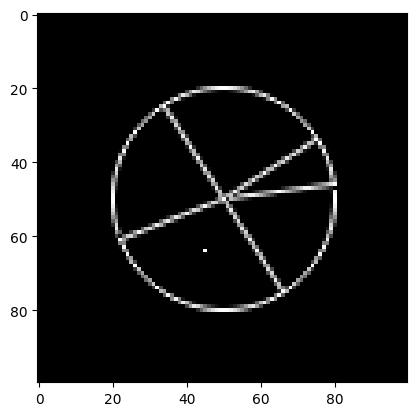

In [26]:
image, label = L.GPImage.figure3('pie')
imshow(image, cmap='gray')

question = 'What do you see? There are 5 portions in the pie, and the largest one has a dot inside. Say the size of the largest portion is 1.0. Give me the ratio of size of each portion (exclude the largest portion and go COUNTER_CLOCKWISE from the largest one) to the largest portion.(But, the first returend value should be 1.0 which refers to the largest) Each value should be from 0 to 1. It does not have to be a precise calculation. Just give me your estimate.'
answer = L.ChatGPT.query(question, image)
print(answer, 'GT:', label)

In [4]:
import re
values = re.findall(r'(\d+\.\d+)', answer)
values = [float(val) for val in values]
values.pop(0)
values

[1.0, 0.9, 0.5, 0.7, 0.85]

In [5]:
error = []
for x, y in zip(values, label):
    error.append(y-x)
error

[0.0,
 -0.21250000000000002,
 -0.34375,
 -0.19999999999999996,
 -0.06874999999999998]